<a href="https://colab.research.google.com/github/younghun-cha/DM_2022/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## iris 데이터를 2차원에서 분류

iris 데이터의 feature는 4개

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
iris = load_iris(as_frame=True)
print('iris.keys : \n', iris.keys())

X = iris.data.values
y = iris.target.values
X_scaled = StandardScaler().fit_transform(X)

iris.keys : 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
principalDF = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
finalDF = pd.concat([principalDF, iris.target], axis=1)
finalDF

,PC1,PC2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


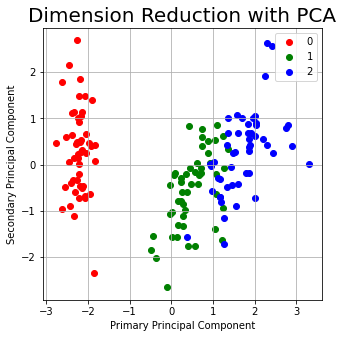

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Reduction with PCA', fontsize=20)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
  idx = finalDF['target'] == target
  ax.scatter(finalDF.loc[idx, 'PC1'], finalDF.loc[idx, 'PC2'], c=color)
ax.legend(targets)
ax.grid()

## PCA를 이용한 유방암 데이터셋 시각화

breast_cancer 데이터의 feature는 30개

In [ ]:
cancer = load_breast_cancer(as_frame=True)
X_scaled = StandardScaler().fit_transform(cancer.data)

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
principalDF = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
finalDF = pd.concat([principalDF, cancer.target], axis=1)
finalDF

,PC1,PC2,target
0,9.192837,1.948583,0
1,2.387802,-3.768172,0
2,5.733896,-1.075174,0
3,7.122953,10.275589,0
4,3.935302,-1.948072,0
...,...,...,...
564,6.439315,-3.576817,0
565,3.793382,-3.584048,0
566,1.256179,-1.902297,0
567,10.374794,1.672010,0


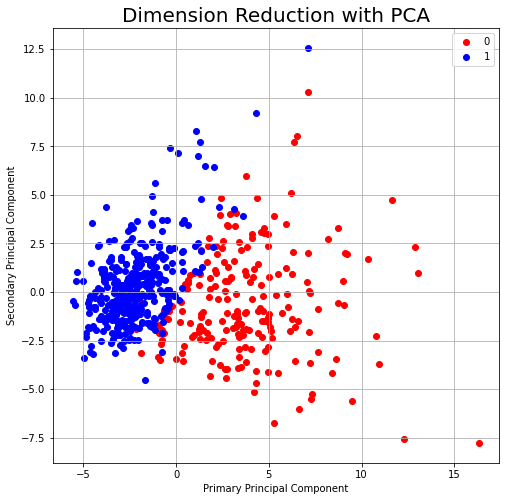

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Primary Principal Component')
ax.set_ylabel('Secondary Principal Component')
ax.set_title('Dimension Reduction with PCA', fontsize=20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
  idx = finalDF['target'] == target
  ax.scatter(finalDF.loc[idx, 'PC1'], finalDF.loc[idx, 'PC2'], c = color)
ax.legend(targets)
ax.grid()

In [ ]:
print("주성분 형태 : ", pca.components_.shape)

주성분 형태 :  (2, 30)


## 주성분을 추출하여 이미지 압축

28 x 28 크기의 이미지는 픽셀을 한 줄로 나열하면 784차원의 벡터라 볼 수 있다. 이 이미지들로부터 100개의 주성분을 추출하고, 이 주성분이 표현하는 공간으로 투영하면 100차원의 데이터로 축소된다. 이러한 방식으로 이미지를 압축해보자

### Keras가 제공하는 fashion mnist 데이터의 사용

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
def plot_images(nrow, ncol, img, cmap='gray'):
  fig = plt.figure()
  fig, ax = plt.subplots(nrow, ncol, figsize=(ncol, nrow))
  for i in range(nrow):
    for j in range(ncol):
      if nrow <= 1: axis = ax[j]
      else: axis = ax[i, j]
      axis.get_xaxis().set_visible(False)
      axis.get_yaxis().set_visible(False)
      axis.imshow(img[i * ncol + j], cmap = cmap)

<Figure size 432x288 with 0 Axes>

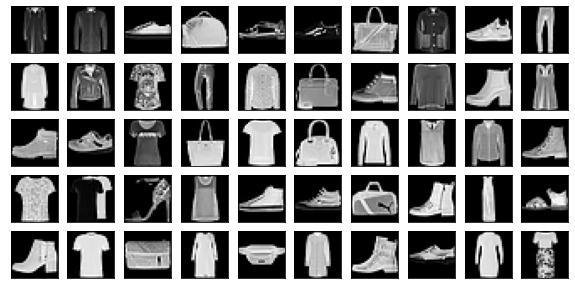

In [ ]:
rndinx = np.random.randint(0, len(train_images) - 50)
samples = train_images[rndinx:rndinx + 50]
plot_images(5, 10, samples)

In [ ]:
train_images_flat = train_images.reshape(-1, 28*28)
pca = PCA(n_components=100)
train_reduced = pca.fit_transform(train_images_flat)

<Figure size 432x288 with 0 Axes>

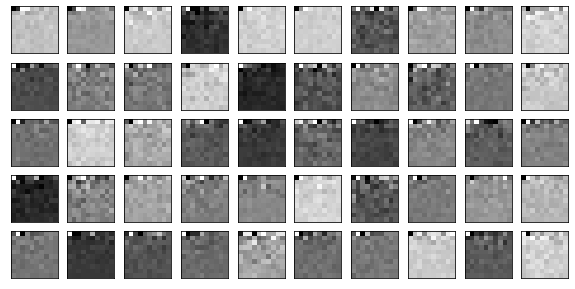

In [ ]:
reduced_images = train_reduced.reshape(-1, 10, 10)
plot_images(5, 10, reduced_images[rndinx:rndinx + 50])

<Figure size 432x288 with 0 Axes>

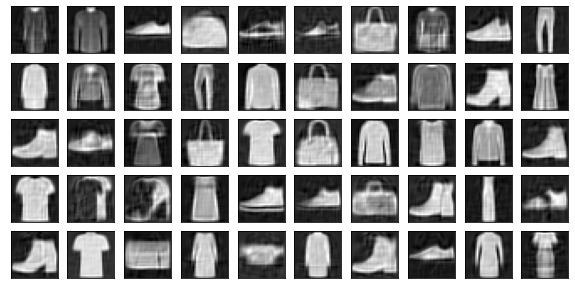

In [ ]:
# 압축된 이미지의 복원
recovered_images = pca.inverse_transform(train_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx:rndinx + 50])

<Figure size 432x288 with 0 Axes>

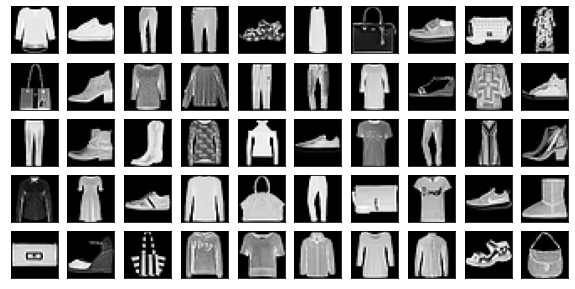

In [ ]:
# 테스트 데이터에 적용
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx + 50]
plot_images(5, 10, samples)

<Figure size 432x288 with 0 Axes>

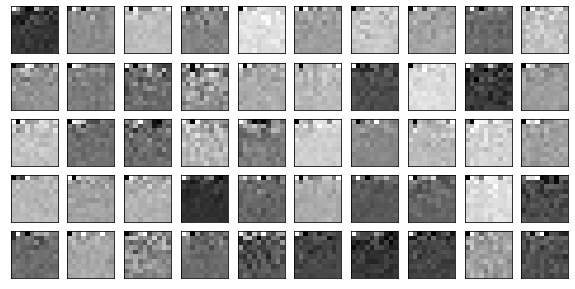

In [ ]:
test_images_flat = test_images.reshape(-1, 28*28)
pca = PCA(n_components=100)
test_reduced = pca.fit_transform(test_images_flat)

reduced_images = test_reduced.reshape(-1, 10, 10)
plot_images(5, 10, reduced_images[rndinx:rndinx + 50])

<Figure size 432x288 with 0 Axes>

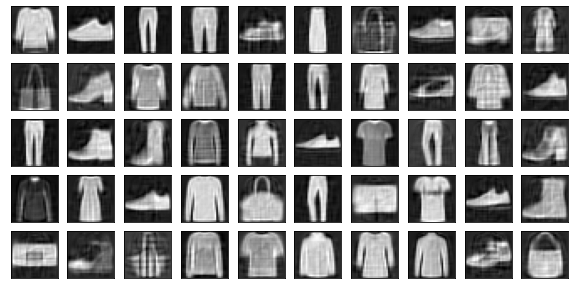

In [ ]:
recovered_images = pca.inverse_transform(test_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx:rndinx + 50])

<Figure size 432x288 with 0 Axes>

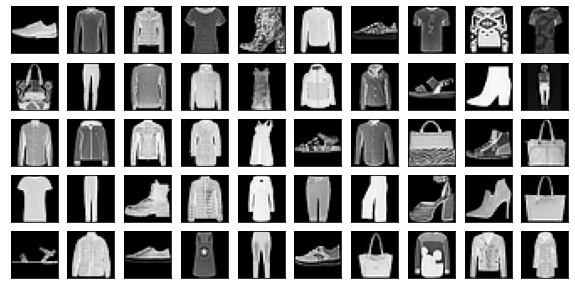

<Figure size 432x288 with 0 Axes>

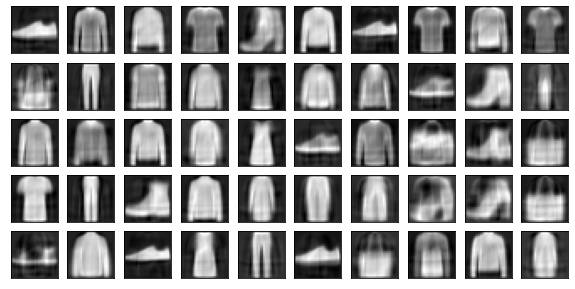

In [ ]:
# 5 x 5의 매우 작은 크기로 압축한다면?
rndinx = np.random.randint(0, len(train_images) - 50)
samples = train_images[rndinx:rndinx + 50]
plot_images(5, 10, samples)

train_images_flat = train_images.reshape(-1, 28*28)
pca = PCA(n_components = 25) # 5 x 5

train_reduced = pca.fit_transform(train_images_flat)
recovered_images = pca.inverse_transform(train_reduced)
recovered_images = recovered_images.reshape(-1, 28, 28)
plot_images(5, 10, recovered_images[rndinx:rndinx + 50])